# Hypothesis analysis of sportstat dataset
## Tianjiao Yang 07.26.2023

# Data import and preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
athlete_events= pd.read_csv('/home/jovyan/work/athlete_events.csv', error_bad_lines=False, engine="python")
region=pd.read_csv('/home/jovyan/work/noc_regions.csv')

Skipping line 109836: unexpected end of data


## Hypothesis 1 Analysis
Test if Female and Male have the same chance of winning a medal

In [3]:
gender_df=pysqldf("select ID, Name, sex, NOC, games, sport, event, medal from athlete_events;")

In [4]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109834 entries, 0 to 109833
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      109834 non-null  int64 
 1   Name    109834 non-null  object
 2   Sex     109834 non-null  object
 3   NOC     109834 non-null  object
 4   Games   109834 non-null  object
 5   Sport   109834 non-null  object
 6   Event   109834 non-null  object
 7   Medal   15750 non-null   object
dtypes: int64(1), object(7)
memory usage: 6.7+ MB


In [5]:
gender_df.head(20)

,ID,Name,Sex,NOC,Games,Sport,Event,Medal
0,1,A Dijiang,M,CHN,1992 Summer,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,CHN,2012 Summer,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,DEN,1920 Summer,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,DEN,1900 Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,NED,1988 Winter,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,NED,1988 Winter,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,NED,1992 Winter,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,NED,1992 Winter,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,NED,1994 Winter,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,NED,1994 Winter,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [6]:
gender_metric=pysqldf("select distinct sex, count(sex) as eventnumber, count(medal) as medalnumber from gender_df group by sex")

In [7]:
gender_metric

,Sex,eventnumber,medalnumber
0,F,28878,4286
1,M,80956,11464


### Conclusion: 
AB test result showed that female has higher chance of winning a medal (14%) than male (15%) at a p-value of 0.0046

## Hypothesis 2 Analysis
1. Test if athletes come from diffrent regions evenly.
2. Test if athletes coming from different regions have the same chance of winnin a medal.

In [8]:
region_metric=pysqldf('''
            select count(distinct id) as athletes, count(*) as eventnumber, region, count(medal) as medalnumber
            from athlete_events a
            inner join region r
            on a.NOC=r.NOC
            group by r.region;
            ''')

In [9]:
region_metric.head(10)

,athletes,eventnumber,region,medalnumber
0,7,8,None,0
1,38,46,Afghanistan,0
2,14,19,Albania,0
3,213,308,Algeria,6
4,8,9,American Samoa,0
5,26,88,Andorra,0
6,88,139,Angola,0
7,31,55,Antigua,0
8,885,1554,Argentina,131
9,67,105,Armenia,6


In [10]:
pysqldf("select athletes, region from region_metric order by athletes desc ;")

,athletes,region
0,4381,USA
1,3227,France
2,2940,UK
3,2901,Germany
4,2451,Italy
...,...,...
201,3,Kosovo
202,2,Burkina Faso
203,1,Kiribati
204,1,Lesotho


In [11]:
region_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   athletes     206 non-null    int64 
 1   eventnumber  206 non-null    int64 
 2   region       205 non-null    object
 3   medalnumber  206 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.6+ KB


In [12]:
pysqldf("select athletes, region from region_metric order by athletes desc  limit 10 ;")

,athletes,region
0,4381,USA
1,3227,France
2,2940,UK
3,2901,Germany
4,2451,Italy
5,2128,Canada
6,1809,Australia
7,1723,Sweden
8,1653,Russia
9,1314,Spain


### Conclusion
1. Apparently, numbers of athletes from different regions are very deferent.
2. We could see the top 10 regions are from Europe, North america, and Australia.
3. None of regions in Asia nor Africa has population of athletes ranked in top 10.
4. From this we could conclude that olympic games are not as popular in north america, euroup, and australia compared to asia and africa
5. This could be caused by the economic, political or other reason or the habit of people regarding sports.

In [13]:
region_medal_metric=pysqldf("select region, eventnumber, medalnumber from region_metric order by athletes desc;")
region_medal_metric

,region,eventnumber,medalnumber
0,USA,8391,2542
1,France,6640,934
2,UK,5698,987
3,Germany,6165,1453
4,Italy,5279,789
...,...,...,...
201,Kosovo,3,0
202,Burkina Faso,2,0
203,Kiribati,1,0
204,Lesotho,2,0


In [14]:
region_medal_metric['rate']=region_medal_metric['medalnumber']/region_medal_metric['eventnumber']
region_medal_metric

,region,eventnumber,medalnumber,rate
0,USA,8391,2542,0.302944
1,France,6640,934,0.140663
2,UK,5698,987,0.173219
3,Germany,6165,1453,0.235685
4,Italy,5279,789,0.149460
...,...,...,...,...
201,Kosovo,3,0,0.000000
202,Burkina Faso,2,0,0.000000
203,Kiribati,1,0,0.000000
204,Lesotho,2,0,0.000000


In [15]:
pysqldf("select region, medalnumber, rate from region_medal_metric order by rate desc limit 20;")

,region,medalnumber,rate
0,Russia,1116,0.326125
1,USA,2542,0.302944
2,Pakistan,63,0.238636
3,Germany,1453,0.235685
4,Norway,482,0.210756
5,Jamaica,74,0.198925
6,China,269,0.180295
7,Netherlands,371,0.178023
8,Sweden,650,0.176919
9,Denmark,264,0.176825


### Conlcusion:
1. Different regions have different rate of winning medals
2. Russia and USA athletes are at leading position to win medals with a chance of higher than 30% to win a medal. 
3. This may because that Russia and USA have more advanced techniques and training system. 
4. More over they may have better culture history regarding Olympic games
5. Economics factors may also influence the result
6. Russia and USA could have more experiences too.

## Hypothesis 3 Analysis
Test if numbers if events are increasing by year

In [16]:
# to discover the trend of number of events, we need to consider winter and summer seasons separatly
summer=pysqldf('''
                  select id, region, games, year,city, sport, event, medal
                  from athlete_events a
                    inner join region r
                    on a.NOC=r.NOC
                    where games like "% Summer";
                        ''')
summer

,ID,region,Games,Year,City,Sport,Event,Medal
0,1,China,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,China,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Denmark,1920 Summer,1920,Antwerpen,Football,Football Men's Football,None
3,4,Denmark,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,8,Netherlands,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,None
...,...,...,...,...,...,...,...,...
90561,55532,UK,1924 Summer,1924,Paris,Athletics,"Athletics Men's 5,000 metres",None
90562,55533,New Zealand,2016 Summer,2016,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",None
90563,55533,New Zealand,2016 Summer,2016,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",None
90564,55534,New Zealand,1952 Summer,1952,Helsinki,Rowing,Rowing Men's Coxed Fours,None


In [17]:
winter=pysqldf('''
                  select id, region, games, year,city, sport, event, medal
                  from athlete_events a
                    inner join region r
                    on a.NOC=r.NOC
                    where games like "% Winter";
                        ''')
winter

,ID,region,Games,Year,City,Sport,Event,Medal
0,5,Netherlands,1988 Winter,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
1,5,Netherlands,1988 Winter,1988,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
2,5,Netherlands,1992 Winter,1992,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
3,5,Netherlands,1992 Winter,1992,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
4,5,Netherlands,1994 Winter,1994,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...
19180,55519,Canada,1988 Winter,1988,Calgary,Figure Skating,Figure Skating Mixed Pairs,None
19181,55521,Canada,1964 Winter,1964,Innsbruck,Ice Hockey,Ice Hockey Men's Ice Hockey,None
19182,55521,Canada,1968 Winter,1968,Grenoble,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
19183,55524,Canada,2010 Winter,2010,Vancouver,Ice Hockey,Ice Hockey Women's Ice Hockey,Gold


In [18]:
n_summer_metric= pysqldf("select count(*) as eventnumber, year from summer group by year order by year")
n_summer_metric

,eventnumber,Year
0,142,1896
1,897,1900
2,562,1904
3,643,1906
4,1387,1908
5,1685,1912
6,1875,1920
7,2259,1924
8,2016,1928
9,1333,1932


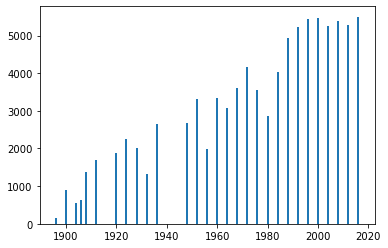

In [19]:
plt.bar(n_summer_metric['Year'], n_summer_metric['eventnumber'])
plt.show()

In [20]:
n_winter_metric= pysqldf("select count(*) as eventnumber, year from winter group by year order by year")
n_winter_metric

,eventnumber,Year
0,188,1924
1,242,1928
2,143,1932
3,367,1936
4,493,1948
5,477,1952
6,583,1956
7,466,1960
8,700,1964
9,749,1968


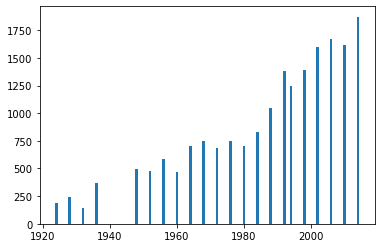

In [21]:
plt.bar(n_winter_metric['Year'], n_winter_metric['eventnumber'])
plt.show()

### Conclusion
1. summer season tends to have much more events than winter season
2. For summer season, number of events keeps increasing until 1992, after that number of events kept at similar level at aroud 5300
3. For winter season, number of events increases by time

## Hypothesis 4 Analysis
Test if younger people (age<=25) have higher rate of winning medals than older people (age>25)

In [22]:
age= pysqldf("select id, age, medal from athlete_events")

In [23]:
age_group=pysqldf('''
                    select id, age,
                    case when age>0 and age<=10 then 'younger than 10'
                         when age>10 and age<=20 then '10 to 20'
                         when age>20 and age<=30 then '20 to 30'
                         when age>30 and age<=40 then '30 to 40'
                         when age>40 and age<=50 then '40 to 50'
                         when age> 50 then 'oder than 50'
                    end as age_group,
                    medal
                    from athlete_events;
                    ''')

In [24]:
pysqldf("select count(*) as eventsnumber, age_group, count(medal) as medalsnumber from age_group group by age_group;")

,eventsnumber,age_group,medalsnumber
0,3942,None,283
1,19132,10 to 20,2153
2,69282,20 to 30,10733
3,14202,30 to 40,2179
4,2566,40 to 50,343
5,710,oder than 50,59


In [25]:
age_metric=pysqldf('''
                        select case when age<=25 then 'Younger than or equal to 25'
                                    when age>25 then 'Oder than 25'
                                    else 'Undefined'
                                end as age_25,
                                count(*) as eventnumber, count(medal) as medalnumber
                        from age_group
                        group by age_25
                        ''')
age_metric

,age_25,eventnumber,medalnumber
0,Oder than 25,44938,7099
1,Undefined,3942,283
2,Younger than or equal to 25,60954,8368


### Conclusion
Athletes younger or at age of 25 have a lower rate of winning a medal (14%) than athletes older than 25 (16%), this could come from the reason that older athletes would have more experience than younger athletes  